# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wellington
Processing Record 2 of Set 1 | laurinburg
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | rio san juan
Processing Record 8 of Set 1 | chernyshevskiy
Processing Record 9 of Set 1 | jacmel
Processing Record 10 of Set 1 | verdal
Processing Record 11 of Set 1 | ulsteinvik
Processing Record 12 of Set 1 | kerman
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | piterka
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | sarupathar
Processing Record 21 of Set 1 | urzhar
Processing Record 22 of Set 1 | nizhneangarsk
Processi

Processing Record 40 of Set 4 | kataragama
City not found. Skipping...
Processing Record 41 of Set 4 | pionerskiy
Processing Record 42 of Set 4 | kampene
Processing Record 43 of Set 4 | chita
Processing Record 44 of Set 4 | hovd
Processing Record 45 of Set 4 | lobujya
Processing Record 46 of Set 4 | chonchi
Processing Record 47 of Set 4 | manacapuru
Processing Record 48 of Set 4 | sarangani
Processing Record 49 of Set 4 | karliova
Processing Record 0 of Set 5 | oum hadjer
Processing Record 1 of Set 5 | nouadhibou
Processing Record 2 of Set 5 | tokar
Processing Record 3 of Set 5 | kiffa
Processing Record 4 of Set 5 | fisterra
Processing Record 5 of Set 5 | celestun
Processing Record 6 of Set 5 | kedrovyy
Processing Record 7 of Set 5 | toungo
Processing Record 8 of Set 5 | xai-xai
Processing Record 9 of Set 5 | nicoya
Processing Record 10 of Set 5 | chinde
Processing Record 11 of Set 5 | malaryta
Processing Record 12 of Set 5 | kruisfontein
Processing Record 13 of Set 5 | fnidek
Processi

Processing Record 30 of Set 8 | bonthe
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | kualakapuas
Processing Record 33 of Set 8 | ritchie
Processing Record 34 of Set 8 | xinyuan
Processing Record 35 of Set 8 | zapata
Processing Record 36 of Set 8 | yuscaran
Processing Record 37 of Set 8 | coronel oviedo
Processing Record 38 of Set 8 | xingcheng
Processing Record 39 of Set 8 | tinajo
Processing Record 40 of Set 8 | thunder bay
Processing Record 41 of Set 8 | pointe-noire
Processing Record 42 of Set 8 | shakiso
Processing Record 43 of Set 8 | virginia
Processing Record 44 of Set 8 | havre
Processing Record 45 of Set 8 | puerto leguizamo
Processing Record 46 of Set 8 | montehermoso
Processing Record 47 of Set 8 | san luis de la loma
Processing Record 48 of Set 8 | al bawiti
Processing Record 49 of Set 8 | colby
Processing Record 0 of Set 9 | kayangel
Processing Record 1 of Set 9 | moyale
Processing Record 2 of Set 9 | san felipe
Processing Record 3 of Set 9 |

Processing Record 21 of Set 12 | lubang
Processing Record 22 of Set 12 | belmonte
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | ciudad lazaro cardenas
Processing Record 25 of Set 12 | port moresby
Processing Record 26 of Set 12 | karaton
Processing Record 27 of Set 12 | mount isa
Processing Record 28 of Set 12 | manokwari
Processing Record 29 of Set 12 | ingeniero jacobacci
Processing Record 30 of Set 12 | nikolayevsk-on-amure
Processing Record 31 of Set 12 | wa
City not found. Skipping...
Processing Record 32 of Set 12 | kolonia town
Processing Record 33 of Set 12 | tataouine
Processing Record 34 of Set 12 | acarau
Processing Record 35 of Set 12 | faruka
Processing Record 36 of Set 12 | isle of lewis
City not found. Skipping...
Processing Record 37 of Set 12 | cold lake
Processing Record 38 of Set 12 | cynthiana
Processing Record 39 of Set 12 | bestobe
Processing Record 40 of Set 12 | silver city
Processing Record 41 of Set 12 | hluti
Processing Record 42 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          611
Lat           611
Lng           611
Max Temp      611
Humidity      611
Cloudiness    611
Wind Speed    611
Country       611
Date          611
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wellington,-41.2866,174.7756,64.58,76,100,20.71,NZ,1683578473
1,laurinburg,34.7741,-79.4628,85.96,48,0,5.75,US,1683578473
2,edinburgh of the seven seas,-37.0676,-12.3116,59.97,64,100,10.67,SH,1683578473
3,college,64.8569,-147.8028,50.32,54,75,5.75,US,1683578474
4,grytviken,-54.2811,-36.5092,31.64,78,11,11.16,GS,1683578474


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wellington,-41.2866,174.7756,64.58,76,100,20.71,NZ,1683578473
1,laurinburg,34.7741,-79.4628,85.96,48,0,5.75,US,1683578473
2,edinburgh of the seven seas,-37.0676,-12.3116,59.97,64,100,10.67,SH,1683578473
3,college,64.8569,-147.8028,50.32,54,75,5.75,US,1683578474
4,grytviken,-54.2811,-36.5092,31.64,78,11,11.16,GS,1683578474


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

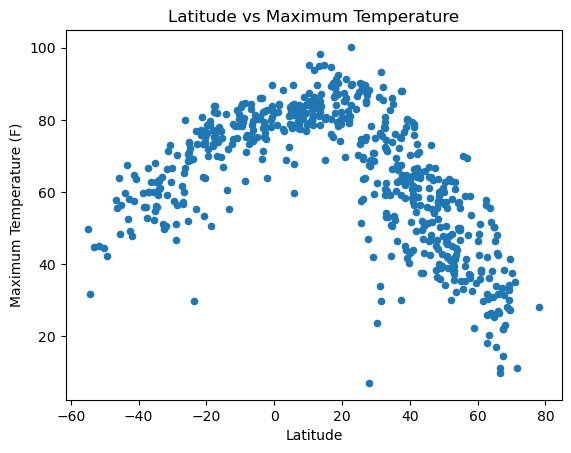

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp')

# Incorporate the other graph properties
plt.title("Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

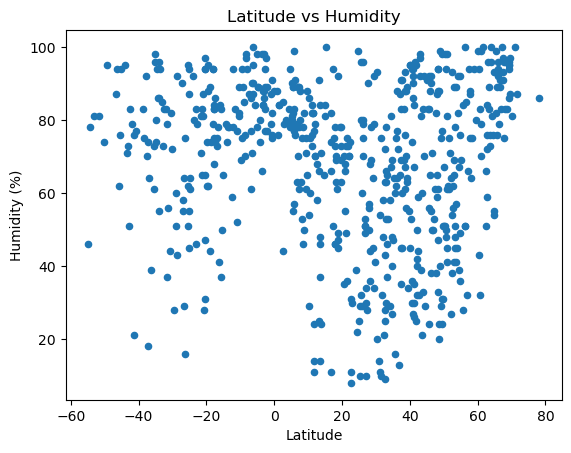

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity')

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

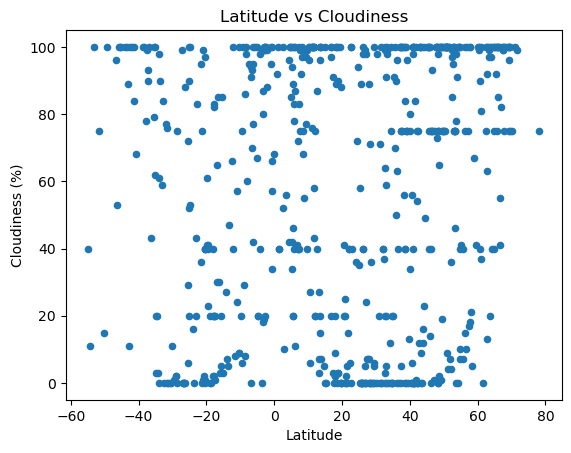

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness')

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

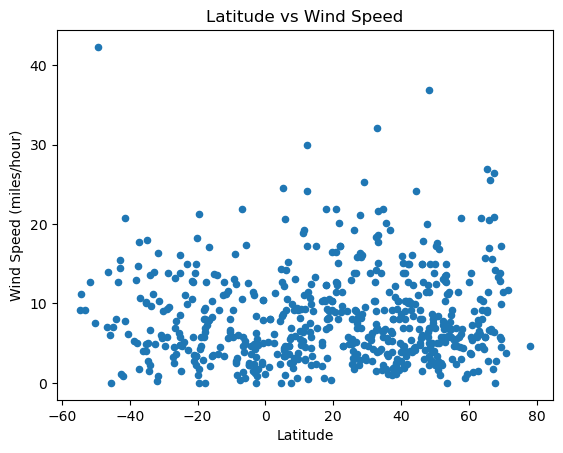

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed')

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (miles/hour)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def regression(hemisphere, weather_variable, ylabel):
    regression = linregress(hemisphere, weather_variable)
    fit = regression[0] * hemisphere + regression[1]
    print(f"The r-value is: {regression[2]}")
    
    plt.scatter(hemisphere, weather_variable)
    plt.plot(hemisphere, fit, "r--", label=f"y={round(regression[0],2)}x + {round(regression[1],2)}")
    plt.legend()
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Latitude")
    plt.show()       

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,laurinburg,34.7741,-79.4628,85.96,48,0,5.75,US,1683578473
3,college,64.8569,-147.8028,50.32,54,75,5.75,US,1683578474
6,rio san juan,19.6439,-70.0763,82.11,73,88,16.46,DO,1683578474
7,chernyshevskiy,63.0128,112.4714,30.34,96,100,6.53,RU,1683578480
8,jacmel,18.2342,-72.5347,91.24,70,100,8.05,HT,1683578480


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wellington,-41.2866,174.7756,64.58,76,100,20.71,NZ,1683578473
2,edinburgh of the seven seas,-37.0676,-12.3116,59.97,64,100,10.67,SH,1683578473
4,grytviken,-54.2811,-36.5092,31.64,78,11,11.16,GS,1683578474
5,west island,-12.1568,96.8225,78.78,94,40,3.44,CC,1683578474
13,waitangi,-43.9535,-176.5597,59.83,95,100,8.01,NZ,1683578481


In [19]:
# Assign latitudes in each hemisphere to a variable
northern = northern_hemi_df['Lat']
southern = southern_hemi_df['Lat']

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8179319288647219


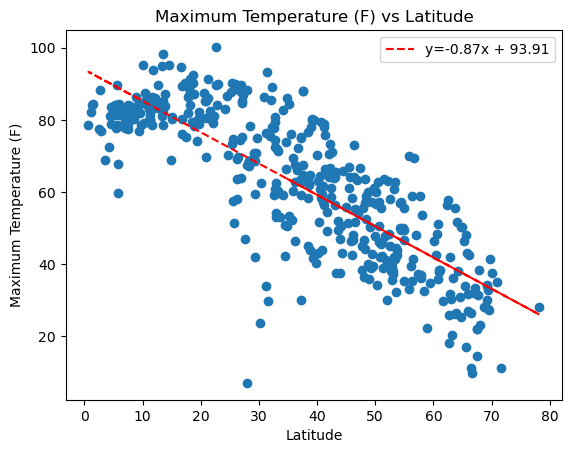

In [20]:
# Linear regression on Northern Hemisphere
regression(northern, northern_hemi_df['Max Temp'], "Maximum Temperature (F)")

The r-value is: 0.7754434379758804


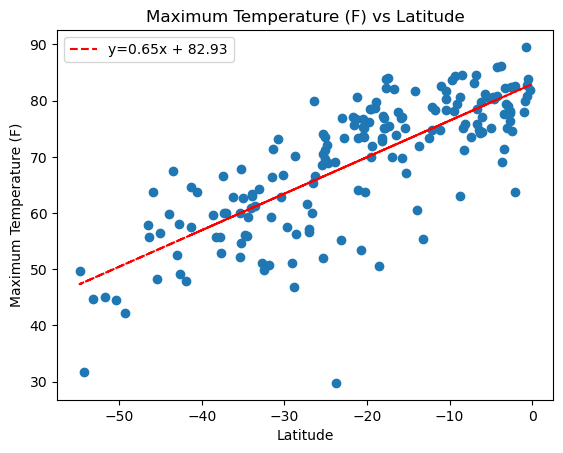

In [21]:
# Linear regression on Southern Hemisphere
regression(southern, southern_hemi_df['Max Temp'], "Maximum Temperature (F)")

**Discussion about the linear relationship:** As expected, the southern hemisphere displays a positive corrolation and the northern hemisphere displays a negative corrolation. This is in line with temperatures dropping as you get further from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13636511870996082


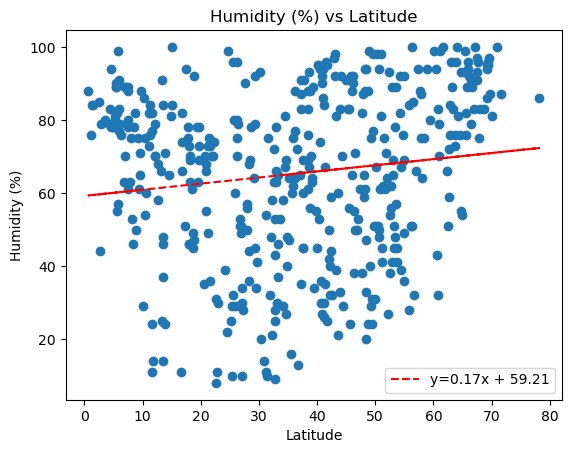

In [22]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Humidity'], "Humidity (%)")

The r-value is: 0.2346145976092406


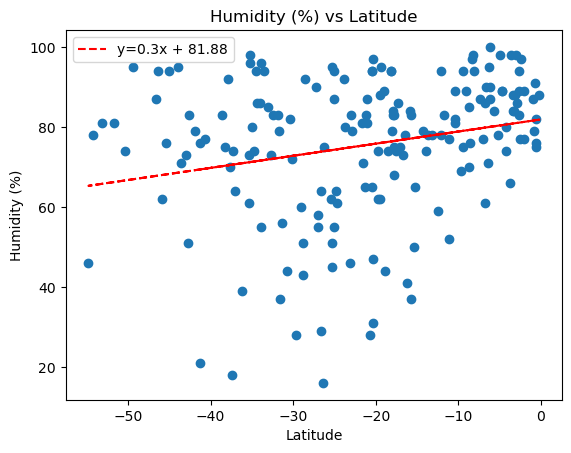

In [23]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Humidity'], "Humidity (%)")

**Discussion about the linear relationship:** The correlation between humidity and latitude is either very weak or nonexistant in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17065164632962934


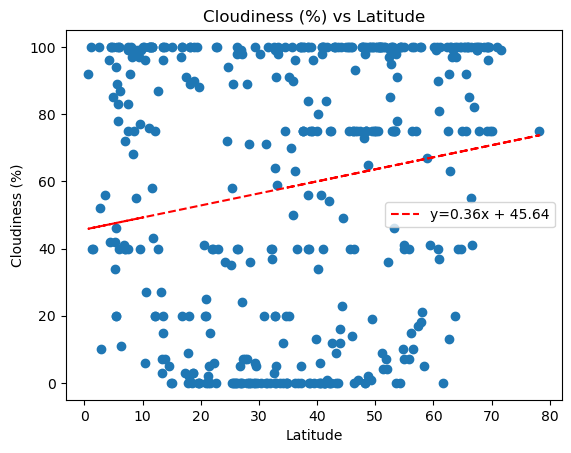

In [24]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Cloudiness'], "Cloudiness (%)")

The r-value is: -0.0065015765786150485


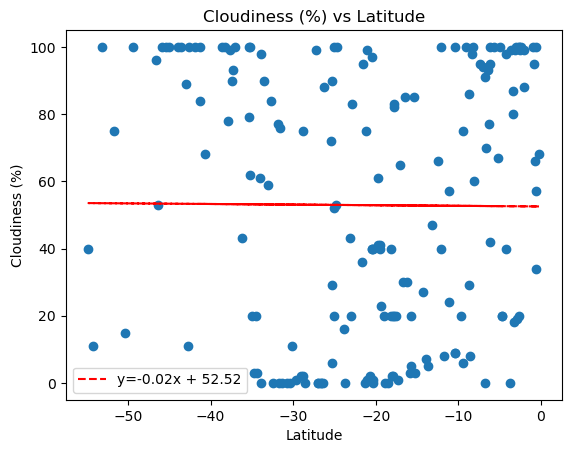

In [25]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Cloudiness'], "Cloudiness (%)")

**Discussion about the linear relationship:** The correlation between cloudiness and latitude is either very weak or nonexistant in both hemispheres. In looking at the graphs, the line does not appear to fit the data at all.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023747125756340946


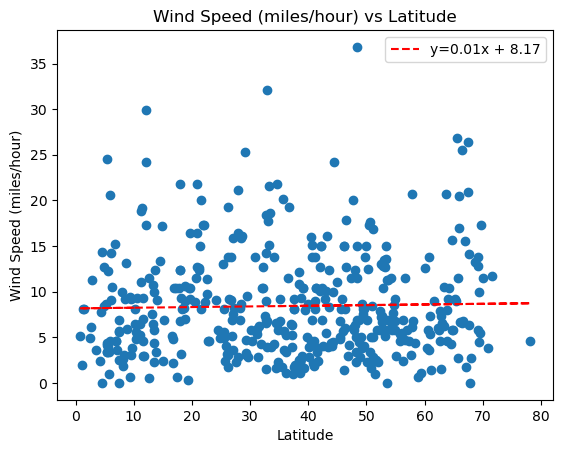

In [26]:
# Northern Hemisphere
regression(northern, northern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

In [ ]:
# Southern Hemisphere
regression(southern, southern_hemi_df['Wind Speed'], "Wind Speed (miles/hour)")

**Discussion about the linear relationship:** The correlation between wind speeds and latitude is either very weak or nonexistant in both hemispheres.